In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import math, os
from itertools import product
from multiprocessing import Pool
from functions import*
import itertools
import numpy as np

import time
import torch.multiprocessing as mp
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
import copy
import pdb

Inflection:  0.9747862873111836


Text(0, 0.5, 'Max Timestep')

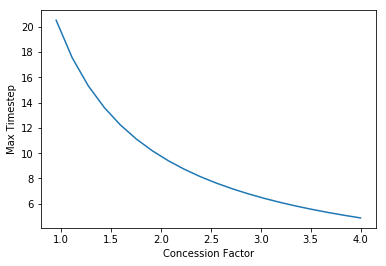

In [4]:
d = 0.95
print("Inflection: ", -1/(20*np.log(d)))
cspan   = np.linspace(0.95,4,20)
maxspan = (-1/np.log(d)) *(1/cspan)
plt.plot(cspan,maxspan)
plt.xlabel("Concession Factor")
plt.ylabel("Max Timestep")

In [210]:
c_list = [0.95,1.5,2,3,5,10]
d = 0.95

sec_derivs = np.zeros(len(c_list))
deltaTs    = np.zeros(len(c_list))
deltaRs    = np.zeros(len(c_list))
RTs        = np.zeros(len(c_list))
R_list, T_list = [], []
for i,c in enumerate(c_list):   
    __, rs, ts = eval_net(c,d,100)
    R_list.append(rs)
    T_list.append(ts)
    t_opt, u_opt = find_opt(c,d)
#     t_theo = -1 / (c*np.log(d))
#     if t_theo > 20:
#         t_theo = 20
    sec_d  = second_derivative(c,d,t_opt,20)
    t_dif  = ((t_opt - ts)).mean()
    r_dif  = ((6*u_opt - rs)).mean()
    rt_dif = (t_dif * r_dif)
    print(t_dif)
    print(r_dif)
    deltaTs[i], deltaRs[i], RTs[i] = t_dif, r_dif, rt_dif
    sec_derivs[i] = sec_d

second_derivative(0.3,d,-1/(c* np.log(d)),20)*100

11.51
-0.7159316397163821
7.77
-1.0891358436222436
5.92
-1.276559302868947
5.0
-1.3626215465901788
3.0
-1.301606719735265
1.0
-0.9068678832054138


c:  0.95
Second Derivative:  -0.09427419560569607
c:  1.5
Second Derivative:  -0.1520179571856133
c:  2
Second Derivative:  -0.22281460209018425
c:  3
Second Derivative:  -0.38881260195395795
c:  5
Second Derivative:  -0.7766407528694178
c:  10
Second Derivative:  -1.8861780183902097


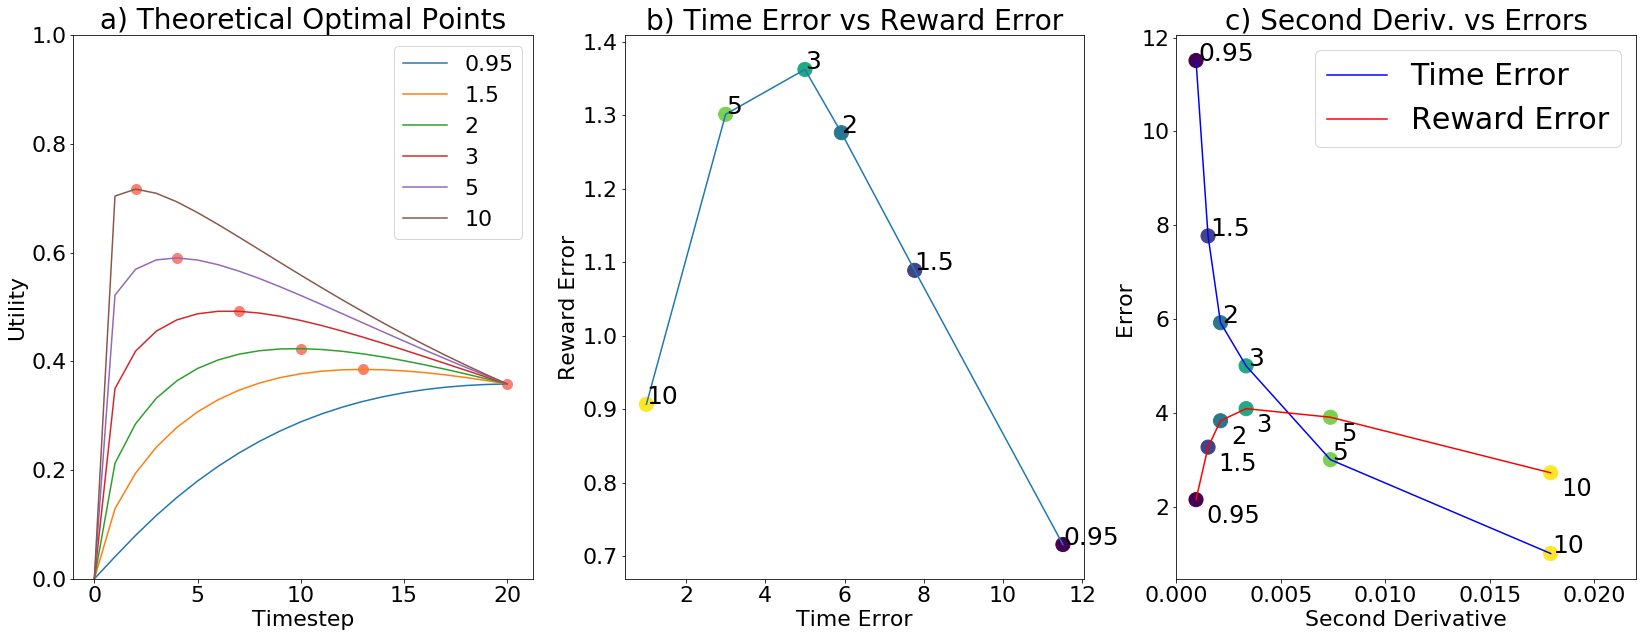

In [213]:
plt.figure(figsize=(28,10))

plt.subplot(1,3,1)
c_list = [0.95,1.5,2,3,5,10]
d = 0.95
for c in c_list:   
    plt_max(c,d)
    print("c: ", c)
    t = -1 / (c*np.log(d))
    if t > 20:
        t = 20
    print("Second Derivative: ", second_derivative(c,d,t,20)*100)
plt.legend(fontsize = 22)
plt.ylabel("Utility", fontsize = 22)
plt.xlabel("Timestep", fontsize = 22)
plt.title("a) Theoretical Optimal Points", fontsize = 28)

plt.subplot(1,3,2)
plt.scatter(deltaTs, np.abs(deltaRs), c = np.arange(len(RTs)),s=200)
plt.plot(deltaTs, np.abs(deltaRs))
for i, txt in enumerate(c_list):
    x = deltaTs[i] + 0.1* (5- deltaTs[i]) 
    plt.annotate(txt, (deltaTs[i], np.abs(deltaRs[i])), fontsize = 25)
plt.xlabel("Time Error", fontsize = 22)
plt.ylabel("Reward Error", fontsize = 22)
plt.title("b) Time Error vs Reward Error", fontsize = 28)

plt.subplot(1,3,3)
sec_derivs = np.abs(sec_derivs)
plt.scatter(sec_derivs, deltaTs, c = np.arange(len(RTs)),s=200)
plt.plot(sec_derivs, deltaTs, color = "b", label = "Time Error")
plt.scatter(sec_derivs, 3*np.abs(deltaRs), c = np.arange(len(RTs)),s=200)
plt.plot(sec_derivs, 3*np.abs(deltaRs), color = "r", label = "Reward Error")

# plt.scatter(sec_derivs, np.abs(RTs), c = np.arange(len(RTs)),s=200)
# plt.plot(sec_derivs, np.abs(RTs), color = "r", label = "RT")

plt.legend(fontsize = 30)

for i, txt in enumerate(c_list):
    plt.annotate(txt, (sec_derivs[i]+0.0001, deltaTs[i]), fontsize = 25)
    plt.annotate(txt, (sec_derivs[i]+0.0005, 3*np.abs(deltaRs[i])-0.5), fontsize = 24)
plt.xlabel("Second Derivative", fontsize = 22)
plt.ylabel("Error ", fontsize = 22)
plt.xlim(0,0.022)
plt.title("c) Second Deriv. vs Errors", fontsize = 28)
# plt.savefig("figures/second_deriv.png")